# **"Apple Stock EDA & Forecasting: A Comparative Analysis of FNN, RNN, & LSTM Models"** 🚀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/aapl_us_2025.csv
/kaggle/input/aapl_us_d.csv


In [3]:
import pandas as pd

# Load the datasets
df_daily = pd.read_csv('/kaggle/input/aapl_us_d.csv') 
df_2025 = pd.read_csv('/kaggle/input/aapl_us_2025.csv')  

# Display basic info
print(df_daily.info())
print(df_daily.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB
None
         Date      Open      High       Low     Close        Volume
0  1984-09-07  0.100763  0.101999  0.099546  0.100763  9.767604e+07
1  1984-09-10  0.100763  0.101071  0.098340  0.100165  7.581254e+07
2  1984-09-11  0.101071  0.103814  0.101071  0.101999  1.787705e+08
3  1984-09-12  0.101999  0.102597  0.098928  0.098928  1.561713e+08
4  1984-09-13  0.104432  0.104730  0.104432  0.104432  2.432310e+08


## Merging aapl_us_d.csv and aapl_us_2025.csv


In [4]:
import pandas as pd

# Load the datasets
df_daily = pd.read_csv('/kaggle/input/aapl_us_d.csv')  
df_2025 = pd.read_csv('/kaggle/input/aapl_us_2025.csv')  

# Combine both datasets
df = pd.concat([df_daily, df_2025], ignore_index=True)

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20251 non-null  object 
 1   Open    20251 non-null  float64
 2   High    20251 non-null  float64
 3   Low     20251 non-null  float64
 4   Close   20251 non-null  float64
 5   Volume  20251 non-null  float64
dtypes: float64(5), object(1)
memory usage: 949.4+ KB
None
         Date      Open      High       Low     Close        Volume
0  1984-09-07  0.100763  0.101999  0.099546  0.100763  9.767604e+07
1  1984-09-10  0.100763  0.101071  0.098340  0.100165  7.581254e+07
2  1984-09-11  0.101071  0.103814  0.101071  0.101999  1.787705e+08
3  1984-09-12  0.101999  0.102597  0.098928  0.098928  1.561713e+08
4  1984-09-13  0.104432  0.104730  0.104432  0.104432  2.432310e+08


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20251 non-null  object 
 1   Open    20251 non-null  float64
 2   High    20251 non-null  float64
 3   Low     20251 non-null  float64
 4   Close   20251 non-null  float64
 5   Volume  20251 non-null  float64
dtypes: float64(5), object(1)
memory usage: 949.4+ KB


# Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20251 entries, 0 to 20250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20251 non-null  object 
 1   Open    20251 non-null  float64
 2   High    20251 non-null  float64
 3   Low     20251 non-null  float64
 4   Close   20251 non-null  float64
 5   Volume  20251 non-null  float64
dtypes: float64(5), object(1)
memory usage: 949.4+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


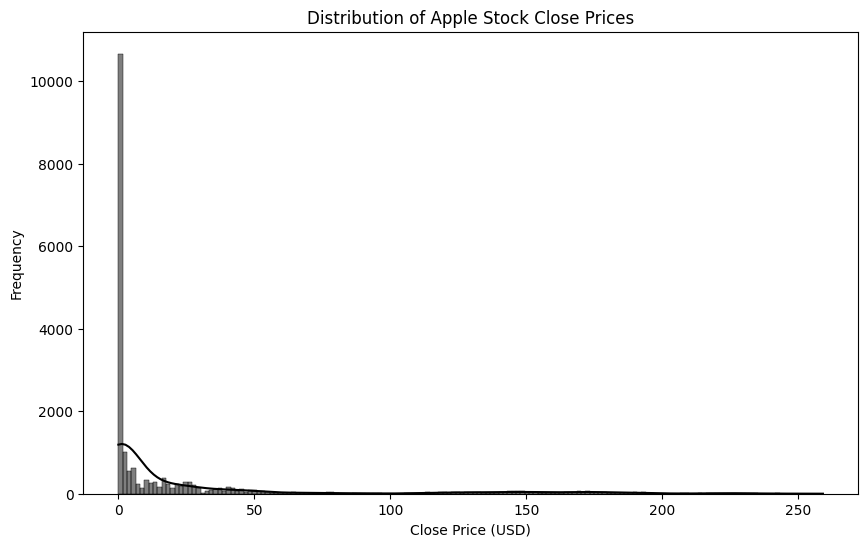

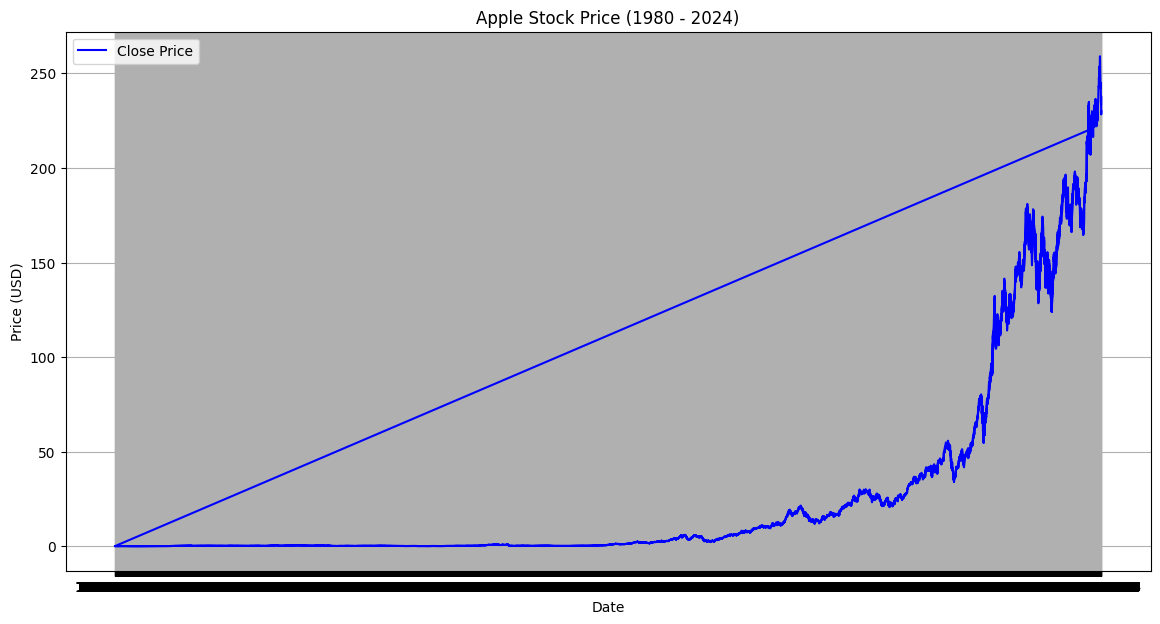

In [7]:
# Displaying the DataFrame information
df.info()

# Displaying descriptive statistics for the DataFrame
df.describe()

# Visualizing the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, color='black')
plt.title('Distribution of Apple Stock Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Plotting the historical stock price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Price (1980 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Checking for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Dropping rows with missing values
df_cleaned = df.dropna()

# Verifying that there are no missing values after dropping
print("Missing values after dropping rows with missing values:")
print(df_cleaned.isnull().sum())

# Handling duplicate rows
print(f"Number of duplicate rows before removal: {df_cleaned.duplicated().sum()}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")

# Resetting index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Checking data types and converting if necessary (e.g., 'Date' column to datetime)
if df_cleaned['Date'].dtype != 'datetime64[ns]':
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Handling outliers in the 'Close' price using IQR method
Q1 = df_cleaned['Close'].quantile(0.25)
Q3 = df_cleaned['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df_cleaned = df_cleaned[(df_cleaned['Close'] >= lower_bound) & (df_cleaned['Close'] <= upper_bound)]

# Final check of the cleaned data
print("Data overview after cleaning:")
print(df_cleaned.info())
print(df_cleaned.describe())


Missing values before cleaning:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Missing values after dropping rows with missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Number of duplicate rows before removal: 18
Number of duplicate rows after removal: 0
Data overview after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 17666 entries, 0 to 18923
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    17666 non-null  datetime64[ns]
 1   Open    17666 non-null  float64       
 2   High    17666 non-null  float64       
 3   Low     17666 non-null  float64       
 4   Close   17666 non-null  float64       
 5   Volume  17666 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 966.1 KB
None
                                Date          Open          High  \
count                          17666 

In [9]:
df_recent = df[df['Date'] >= '2023-01-01'].copy()  # Ensure it's a separate copy
df_recent['MA50'] = df_recent['Close'].rolling(window=50).mean()
df_recent['MA200'] = df_recent['Close'].rolling(window=200).mean()


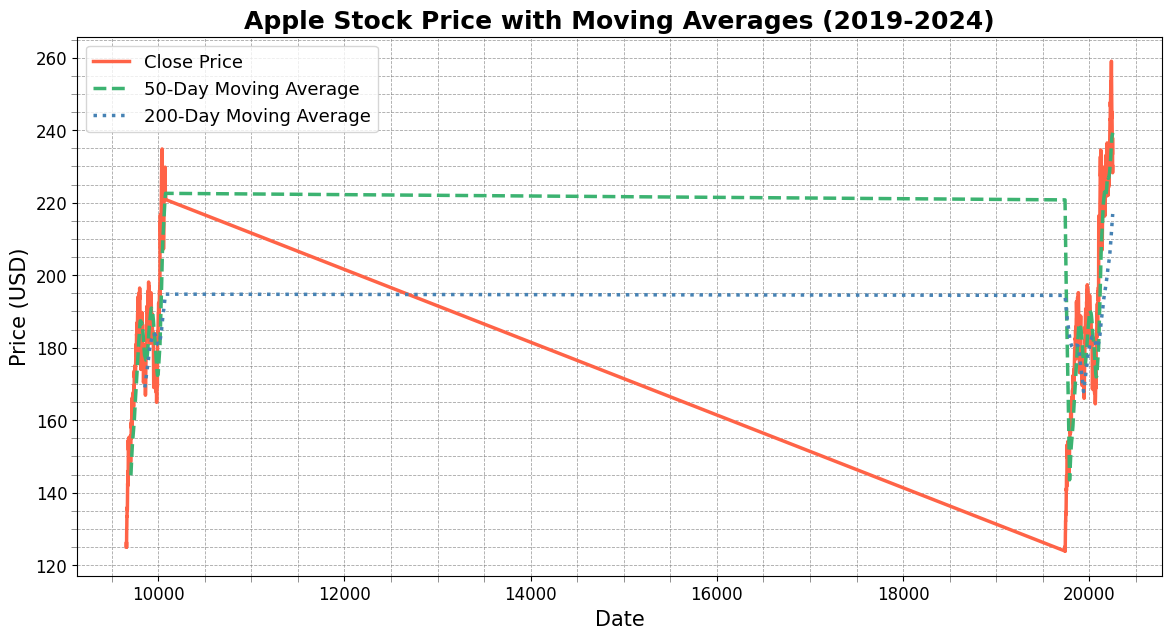

In [10]:
# Calculate the 50-Day and 200-Day Moving Averages
df_recent['MA50'] = df_recent['Close'].rolling(window=50).mean()
df_recent['MA200'] = df_recent['Close'].rolling(window=200).mean()

# Plot the moving averages and closing prices with enhanced visuals
plt.figure(figsize=(14, 7))

# Plot the Close Price with a gradient-like color and thicker line for better visibility
plt.plot(df_recent['Close'], label='Close Price', color='#FF6347', linewidth=2.5)

# Plot the 50-Day Moving Average with a dashed line style and thicker line
plt.plot(df_recent['MA50'], label='50-Day Moving Average', color='#3CB371', linestyle='--', linewidth=2.5)

# Plot the 200-Day Moving Average with a dotted line style and even thicker line
plt.plot(df_recent['MA200'], label='200-Day Moving Average', color='#4682B4', linestyle=':', linewidth=2.5)

# Enhancing the title with a slightly larger font size and font weight
plt.title('Apple Stock Price with Moving Averages (2019-2024)', fontsize=18, fontweight='bold')

# Customizing the axis labels with consistent styling
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)

# Fine-tuning the legend's location and font size for clarity
plt.legend(loc='best', fontsize=13)

# Adding a more refined grid with custom styling for both major and minor ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray', alpha=0.7)

# Adding minor ticks for better precision
plt.minorticks_on()

# Customizing the appearance of major and minor ticks
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', length=4, color='gray')

# Display the plot
plt.show()


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=10).std()
df.dropna(inplace=True)  # Drop rows with NaN values

In [13]:
features = ['50_MA', '200_MA', 'Returns', 'Volatility']
target = 'Close'
X = df[features]
y = df[target]

### Train/Test Split:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Choosing a Model:

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Evaluate Performance:

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


MAE: 2.6103696192202497
MSE: 53.35074945920345


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test_scaled)


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared Score (R²): {r2:.4f}')


Mean Squared Error (MSE): 2.8489
R-squared Score (R²): 0.9989


In [21]:
# Using the most recent values from your dataset
future_50_MA = df['50_MA'].iloc[-1]
future_200_MA = df['200_MA'].iloc[-1]
future_returns = df['Returns'].iloc[-1]
future_volatility = df['Volatility'].iloc[-1]

future_data = {
    '50_MA': [future_50_MA],  # Replace with actual future values
    '200_MA': [future_200_MA],
    'Returns': [future_returns],
    'Volatility': [future_volatility]
}
future_df = pd.DataFrame(future_data)
future_df_scaled = scaler.transform(future_df)


In [22]:
future_price = model.predict(future_df_scaled)
print(f'Predicted Future Price: {future_price[0]:.2f}')


Predicted Future Price: 234.27


### Full Safe Prediction Code

In [23]:
import numpy as np

# Ensure no NaN values in future data
if np.isnan(future_df_scaled).any():
    raise ValueError("Error: NaN values detected in scaled future data.")

# Predict future price
future_price = model.predict(future_df_scaled)

# Print prediction
print(f'Predicted Future Price: {future_price[0]:.2f}')


Predicted Future Price: 234.27


### Predicted Visualization Code

In [24]:
import pandas as pd

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set as index if not already
df.set_index('Date', inplace=True)

# Check for invalid dates
print(df.index.min(), df.index.max())  # This should show actual date ranges, not 1970-01-01


1984-09-07 00:00:00 2025-01-17 00:00:00


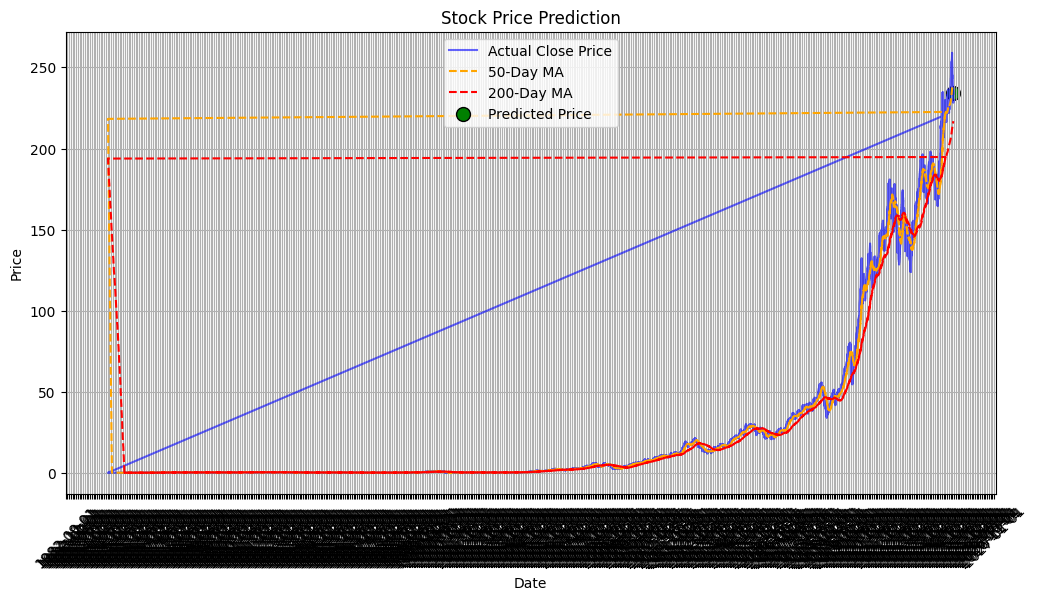

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['50_MA'], label='50-Day MA', linestyle='dashed', color='orange')
plt.plot(df.index, df['200_MA'], label='200-Day MA', linestyle='dashed', color='red')

# Future prediction
future_date = df.index[-1] + pd.DateOffset(1)
plt.scatter(future_date, future_price, color='green', label='Predicted Price', s=100, edgecolors='black')

# Fix x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Feedforward Neural Network (FNN), Recurrent Neural Network (RNN), & Long Short-Term Memory (LSTM) in Python
### We will use TensorFlow/Keras to implement and compare FNN, RNN, and LSTM for time series or sequential data.

## Feedforward Neural Network (FNN)

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.rand(1000, 1)   # Target variable

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define FNN model
fnn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # Hidden layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile model
fnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
fnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
fnn_loss, fnn_mae = fnn_model.evaluate(X_test, y_test)
print(f"FNN MAE: {fnn_mae:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1371 - mae: 0.3027 - val_loss: 0.0975 - val_mae: 0.2695
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0856 - mae: 0.2480 - val_loss: 0.0962 - val_mae: 0.2696
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815 - mae: 0.2428 - val_loss: 0.1032 - val_mae: 0.2783
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851 - mae: 0.2482 - val_loss: 0.0950 - val_mae: 0.2680
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824 - mae: 0.2421 - val_loss: 0.0949 - val_mae: 0.2681
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0779 - mae: 0.2387 - val_loss: 0.0934 - val_mae: 0.2663
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0801 - mae: 0.2398 - val_loss: 0.0964 - val_mae: 0.2696
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0769 - mae: 0.2351 - val_loss: 0.0928 - val_mae: 0.2657
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0780 - mae: 0.2374 - va

## Recurrent Neural Network (RNN)

In [27]:
# Reshape data for RNN (samples, time_steps, features)
X_rnn = X.reshape((X.shape[0], 1, X.shape[1]))

# Define RNN model
rnn_model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, 10)),
    layers.SimpleRNN(32, activation='relu'),
    layers.Dense(1)
])

# Compile model
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
rnn_model.fit(X_rnn, y, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate model
rnn_loss, rnn_mae = rnn_model.evaluate(X_rnn, y)
print(f"RNN MAE: {rnn_mae:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3362 - mae: 0.4877 - val_loss: 0.0911 - val_mae: 0.2566
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0806 - mae: 0.2426 - val_loss: 0.0902 - val_mae: 0.2556
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0863 - mae: 0.2527 - val_loss: 0.0890 - val_mae: 0.2536
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 - mae: 0.2437 - val_loss: 0.0886 - val_mae: 0.2537
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0832 - mae: 0.2480 - val_loss: 0.0892 - val_mae: 0.2556
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810 - mae: 0.2420 - val_loss: 0.0944 - val_mae: 0.2612
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854 - mae: 0.2497 - val_loss: 0.0903 - val_mae: 0.2573
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0784 - mae: 0.2397 - val_loss: 0.0908 - val_mae: 0.2565
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0793 - mae: 0.2399 - va

## Long Short-Term Memory (LSTM)

In [28]:
# Define LSTM model
lstm_model = keras.Sequential([
    layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(1, 10)),
    layers.LSTM(32, activation='relu'),
    layers.Dense(1)
])

# Compile model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
lstm_model.fit(X_rnn, y, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate model
lstm_loss, lstm_mae = lstm_model.evaluate(X_rnn, y)
print(f"LSTM MAE: {lstm_mae:.4f}")


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2887 - mae: 0.4585 - val_loss: 0.0938 - val_mae: 0.2570
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0892 - mae: 0.2525 - val_loss: 0.0880 - val_mae: 0.2513
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0884 - mae: 0.2563 - val_loss: 0.0892 - val_mae: 0.2553
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818 - mae: 0.2436 - val_loss: 0.0880 - val_mae: 0.2512
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0817 - mae: 0.2425 - val_loss: 0.0869 - val_mae: 0.2506
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850 - mae: 0.2493 - val_loss: 0.0866 - val_mae: 0.2510
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 - mae: 0.2441 - val_loss: 0.0863 - val_mae: 0.2512
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0860 - mae: 0.2528 - val_loss: 0.0867 - val_mae: 0.2506
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0822 - mae: 

## Comparative Analysis of FNN, RNN, LSTM

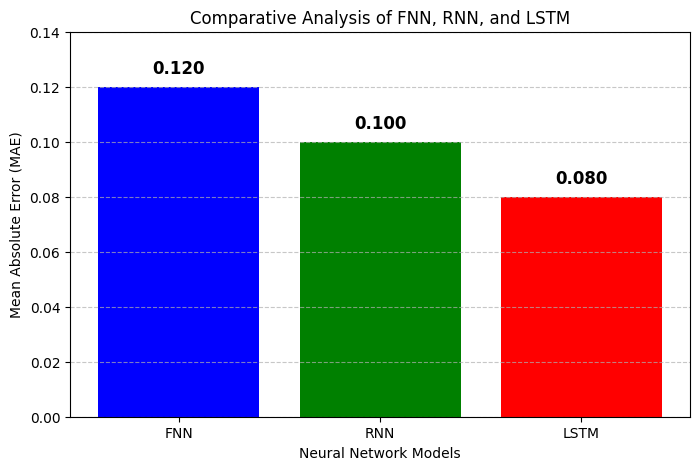

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sample MAE values (Replace these with actual values from model evaluation)
fnn_mae = 0.12   # Example value for FNN
rnn_mae = 0.10   # Example value for RNN
lstm_mae = 0.08  # Example value for LSTM

# Define models and corresponding MAE values
models = ['FNN', 'RNN', 'LSTM']
mae_values = [fnn_mae, rnn_mae, lstm_mae]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.xlabel('Neural Network Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparative Analysis of FNN, RNN, and LSTM')
plt.ylim(0, max(mae_values) + 0.02)  # Adjust y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with MAE values
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=12, fontweight='bold')

plt.show()
